<a href="https://colab.research.google.com/github/wiendewani/Image-Retrieval/blob/khaikal/image_processing/ip_morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://riset.informatika.umm.ac.id/aguseko/batik1.jpg --no-check-certificate

--2021-10-06 10:27:36--  https://riset.informatika.umm.ac.id/aguseko/batik1.jpg
Resolving riset.informatika.umm.ac.id (riset.informatika.umm.ac.id)... 202.52.52.30
Connecting to riset.informatika.umm.ac.id (riset.informatika.umm.ac.id)|202.52.52.30|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 34713 (34K) [image/jpeg]
Saving to: ‘batik1.jpg’

batik1.jpg          100%[===================>]  33.90K  --.-KB/s    in 0s      

2021-10-06 10:27:38 (210 MB/s) - ‘batik1.jpg’ saved [34713/34713]



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import the necessary packages
from matplotlib import pyplot as plt
import argparse
import cv2

Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

Morphological operations


Erosion

In [4]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "/content/drive/MyDrive/02_4_full.jpg"
}

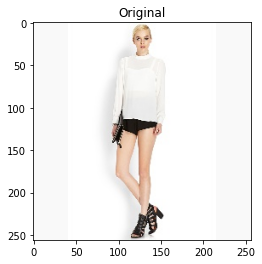

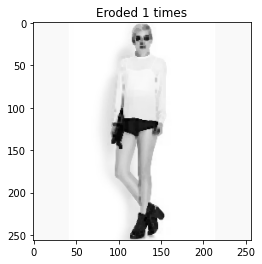

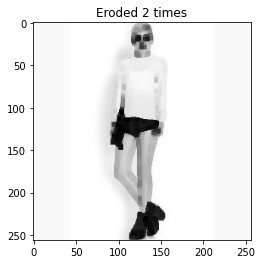

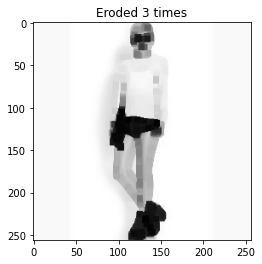

In [5]:
# load the image, convert it to grayscale, and display it to our
# screen
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Original", image)

# apply a series of erosions
for i in range(0, 3):
	eroded = cv2.erode(gray.copy(), None, iterations=i + 1)
	plt_imshow("Eroded {} times".format(i + 1), eroded)

Dilation

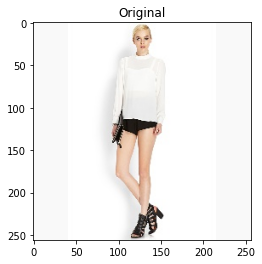

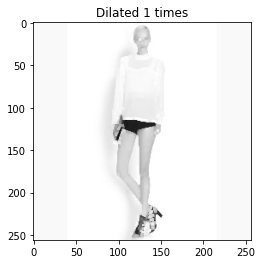

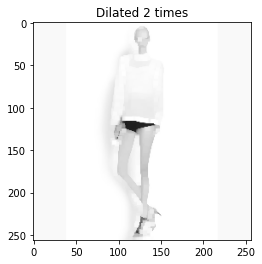

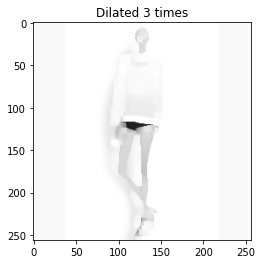

In [6]:
# display the original image
plt_imshow("Original", image)

# apply a series of dilations
for i in range(0, 3):
	dilated = cv2.dilate(gray.copy(), None, iterations=i + 1)
	plt_imshow("Dilated {} times".format(i + 1), dilated)

Opening

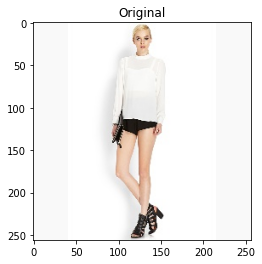

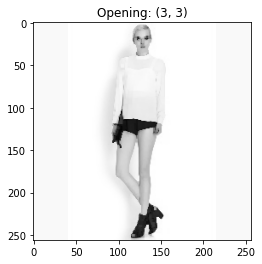

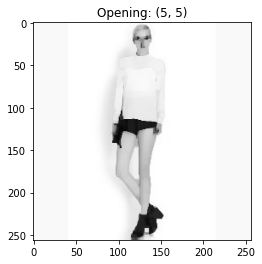

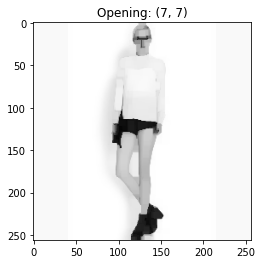

In [7]:
# close all windows to cleanup the screen, then initialize a list of
# of kernels sizes that will be applied to the image
plt_imshow("Original", image)
kernelSizes = [(3, 3), (5, 5), (7, 7)]

# loop over the kernels sizes
for kernelSize in kernelSizes:
	# construct a rectangular kernel from the current size and then
	# apply an "opening" operation
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
	plt_imshow("Opening: ({}, {})".format(
		kernelSize[0], kernelSize[1]), opening)

Closing

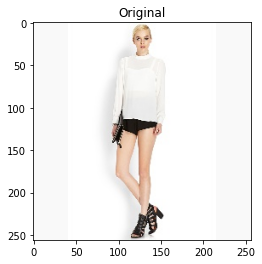

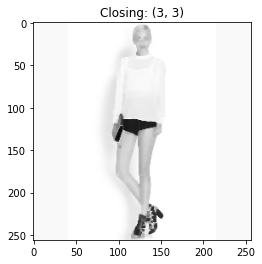

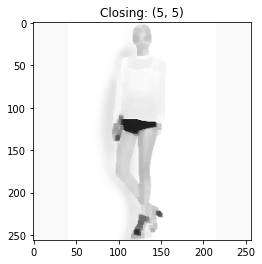

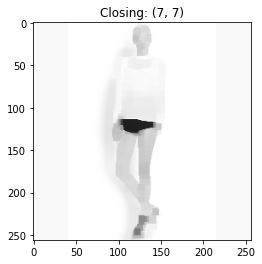

In [8]:
# display the original image
plt_imshow("Original", image)

# loop over the kernels sizes again
for kernelSize in kernelSizes:
	# construct a rectangular kernel form the current size, but this
	# time apply a "closing" operation
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
	plt_imshow("Closing: ({}, {})".format(
		kernelSize[0], kernelSize[1]), closing)

Morphological gradient


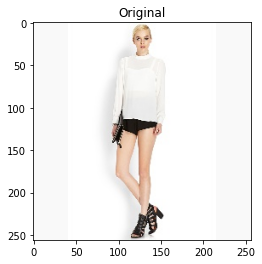

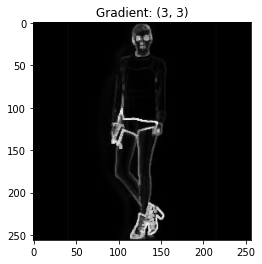

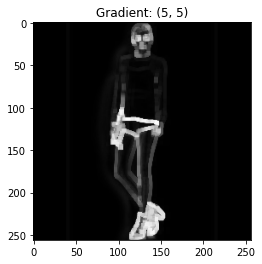

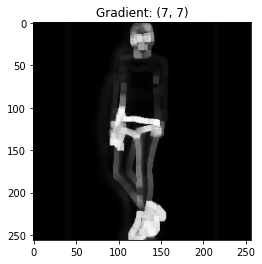

In [9]:
# display the original image
plt_imshow("Original", image)

# loop over the kernels a final time
for kernelSize in kernelSizes:
	# construct a rectangular kernel and apply a "morphological
	# gradient" operation to the image
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
	plt_imshow("Gradient: ({}, {})".format(
		kernelSize[0], kernelSize[1]), gradient)

Morphological hats

Top hat/white hat and black hat

In [10]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "/content/drive/MyDrive/02_4_full.jpg"
}

In [11]:
# load the image and convert it to grayscale
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# construct a rectangular kernel (13x5) and apply a blackhat
# operation which enables us to find dark regions on a light
# background
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)

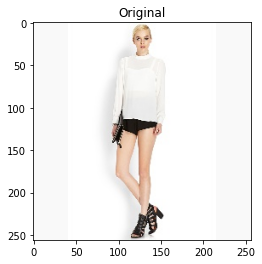

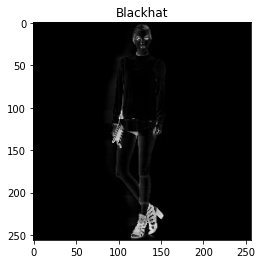

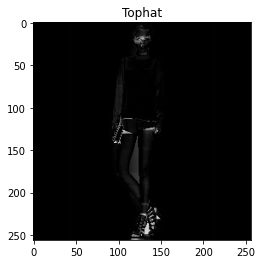

In [12]:
# similarly, a tophat (also called a "whitehat") operation will
# enable us to find light regions on a dark background
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)

# show the output images
plt_imshow("Original", image)
plt_imshow("Blackhat", blackhat)
plt_imshow("Tophat", tophat)